In [3]:
# Tratamiento de datos
import pandas as pd
import numpy as np
#Librerías de visualización
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#2.2.1. Carga el archivo 'world-data' como DataFrame (world)
world=pd.read_csv(r'C:\Users\juanj\Desktop\ThePower Business School\Documentación - Python y SQL\Visualización\world-data.csv',index_col=0)
world.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,latitude,longitude,Continent
0,Afghanistan,60.0,AF,58.1,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,0.28,38041754.0,48.9,9.3,71.4,11.12,"9,797,273",33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,1.20,2854191.0,55.7,18.6,36.6,12.33,"1,747,593",41.153332,20.168331,Europa
2,Algeria,18.0,DZ,17.4,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,1.72,43053054.0,41.2,37.2,66.1,11.70,"31,510,100",28.033886,1.659626,Asia
3,Andorra,164.0,AD,40.0,468,NaN,7.20,376.0,Andorra la Vella,469,...,3.33,77142.0,NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801,Europa
4,Angola,26.0,AO,47.5,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,0.21,31825295.0,77.5,9.2,49.1,6.89,"21,061,025",-11.202692,17.873887,Africa


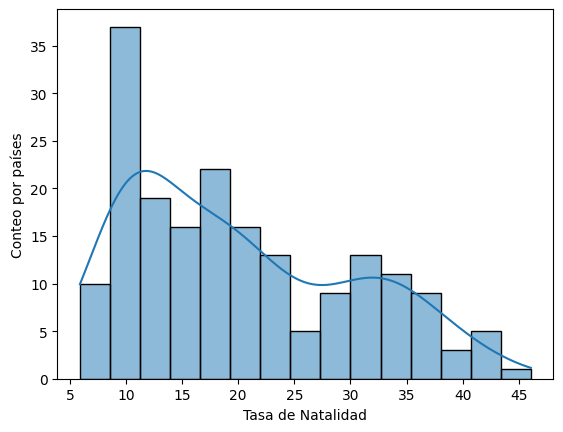

In [6]:
#2.2.2. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente? (Histograma)
plot=sns.histplot(data=world,x='Birth Rate', bins=15, kde=True) #bins es el número de barras, que te permite visualizar mejor los posibles patrones. kde intenta haer una distribución gaussiana de los datos.
plot.set_xlabel('Tasa de Natalidad')
plot.set_ylabel('Conteo por países')
plt.show()
#Patrón: la mayor parte de los países tiene una tasa de natalidad de menos de 25 nacimientos por cada 1000 habitantes.

In [7]:
world.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'latitude',
       'longitude', 'Continent'],
      dtype='object')

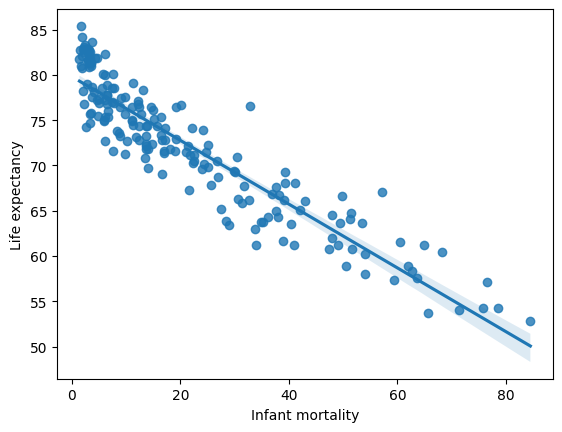

In [8]:
#2.2.3. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes (Regplot).

sns.regplot(data=world,x='Infant mortality', y='Life expectancy')  #a medida que aumenta la mortalidad infantil, la esperanza de vida decrece.
plt.show()

In [9]:
#2.2.4. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente(Pie plot. Recuerda que primero debes hacer un group by con la columna a estuduar).

number_of_countries_by_continent=world.groupby(world['Continent'])['Country'].count().reset_index()
number_of_countries_by_continent

,Continent,Country
0,Africa,12
1,America,36
2,Asia,96
3,Europa,43
4,Oceania,8


In [18]:
pie=px.pie(data_frame=number_of_countries_by_continent,names='Continent',values='Country')
pie

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'Continent=%{label}<br>Country=%{value}<extra></extra>',
              'labels': array(['Africa', 'America', 'Asia', 'Europa', 'Oceania'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([12, 36, 96, 43,  8], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

In [26]:
#2.2.5. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.(Boxplot)
world_europe_life_expectancy=world[world['Continent']=='Europa']['Life expectancy']
px.box(data_frame=world_europe_life_expectancy,x='Life expectancy',orientation='h')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Life expectancy=%{x}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'box',
              'x': array([78.5,  nan, 81.6, 74.2, 81.6, 77.3, 74.9, 78.1, 79. , 81. , 78.2, 81.7,
                          82.5, 80.9, 81.3,  nan, 75.8, 82.3, 82.9, 74.7, 83. , 75.7, 82.1, 82.3,
                          71.8,  nan, 76.8, 81.8,  nan, 82.8, 77.6, 81.3, 75.4, 85.4, 75.5, 77.2,
                          81. , 83.3, 82.5, 83.6, 77.4, 71.6, 81.3]),
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Life expectancy'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})

Text(0, 0.5, 'Número de países')

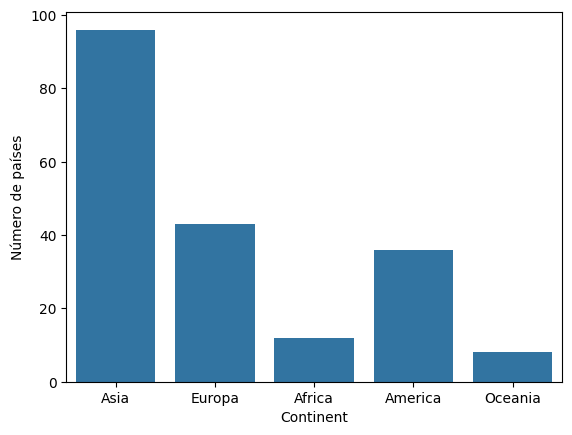

In [33]:
count_plot=sns.countplot(data=world,x='Continent')
count_plot.set_ylabel('Número de países')

In [34]:
world.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'latitude',
       'longitude', 'Continent'],
      dtype='object')

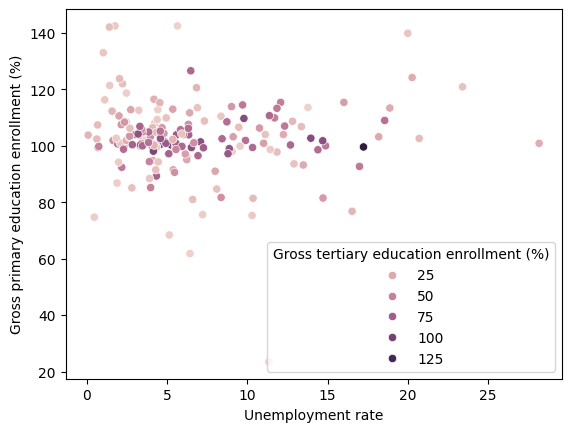

In [35]:
scatter=sns.scatterplot(data=world,x='Unemployment rate',y='Gross primary education enrollment (%)',hue='Gross tertiary education enrollment (%)')

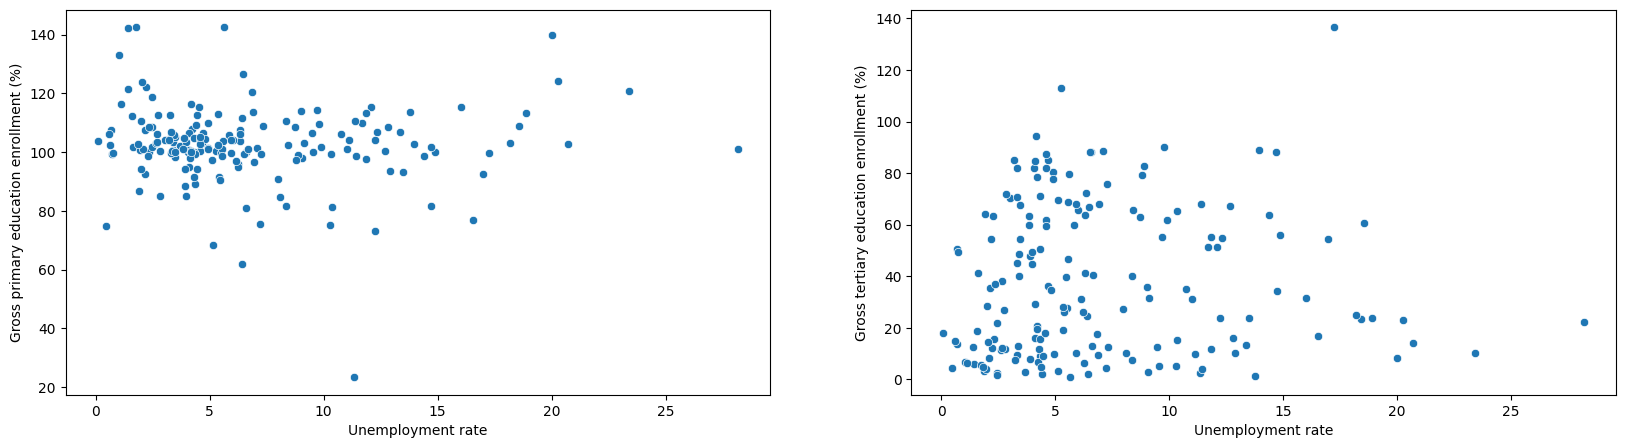

In [41]:
fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.scatterplot(data=world,x='Unemployment rate',y='Gross primary education enrollment (%)',ax=axes[0])
sns.scatterplot(data=world,x='Unemployment rate',y='Gross tertiary education enrollment (%)',ax=axes[1])
plt.show()

In [46]:
df_america=world[world['Continent']=='America']
fig=px.violin(data_frame=df_america, y='Out of pocket health expenditure', box=True)
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': 'Out of pocket health expenditure=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'scalegroup': 'True',
              'showlegend': False,
              'type': 'violin',
              'x0': ' ',
              'xaxis': 'x',
              'y': array([24.3, 17.6, 27.8, 45.2, 22.7, 25.9, 28.3, 14.6, 32.2, 18.3, 21.5,  nan,
                          28.4, 43.7, 43.7, 27.9, 57. , 55.8, 40.5, 36.3, 49.1, 23.7,  0.2, 41.4,
                          36. , 30.5, 36.5, 30.9, 56.6, 48.4, 21.4, 10.1, 37.3, 11.1, 16.2, 45.8]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'violinmode': 'group',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Out of pocket health expenditure'}}}
})